# Author: Bin Li, University of California, Berkeley

# Introduction

It has become increasingly popular to study the brain as a distributed network system rather than a conglomerate of discrete functional modules. Richardson, et al. (2018), as an example, conduct a exploratory study on a big dataset to study the development of two functional specialized networks responsible for people's ability to infer others' mind states (theory of mind) and the ability to empathize others' pain. With this study they were able to confirm the existence of two distinct networks for the theory of mind and empathic pain and demonstrate the functional maturity of those two abilities correlate with the increasing specialization of those two regions-of-interest. 

In light of their achievement, it is tempting to ask whether we could use a similar method or even the same dataset to study the development of other functional regions. For example, it is widely held that the brain is some forms of the hierarchical predictive reinforcement learning machine and the it learns through exploring the environment, making predictions about the environment, generating errors from wrong predictions and learning from the them. In fact, many brain regions have been proposed as the candidates for generating predictive error and reward. Now using the method of Richardson, et al. (2018) we can verify whether these regions correlate with each other and form a dedicated network or they operate out of step with each other. 

This project is comprised of two main parts; one is to replicate the result of Richardson, et al. (2018) by analyzing their dataset in accordance with the description of their methods in the original paper; the other is to use their methods and test them on a group of proposed regions for predictive reward to study whether they demonstrate strong inter-group correlation as a specialized network.

# Method

## Dataset
The dataset is from the study by Richardson, H., Lisandrelli, G., Riobueno-Naylor, A. et al. ("Development of the social brain from age three to twelve years." Nat Commun 9, 1027, 2018)  and is made openly available on Openfmri (https://www.openfmri.org/dataset/ds000228/). It includes data of a large sample of children (n=122, 3-12 years) and adults (n=33) watched a short animated film (Pixar's Partly Cloudy) while undergoing fMRI. The entire film is about 5-6 minutes and is broken down into 168 TRs with each TR last 2 second. T1-weighted structural images were collected in 176 interleaved sagittal slices with 1mm isotropic voxels and grandient-echo EPI sequence collected in 32 interleaved near-axial slices with 2mm isotropic voxels. The participant were not asked to perform any task during scanning, and thus the dataset is not task-specific. Yet as the authors of the study have argued, the stimulus is more engaging than normal psychological task for children participants and contains scenes and story archs that are particularly well-suited for testing the theory of mind, empathic pain, and, as I would argue, predictive reward/error.

Along with the original raw data, the dataset also provide preprocessed data that have been co-registered and normalized to MNI space, nuisance regressors for the use of de-noising, and localization information of the ROIs used in the study (in the form of ROI coordinates and affine transform).


## Preprocessing
The preprocessed image data are provided in the original dataset and were used for this study. In this section I will briefly describe the preprocessing workflow. For more comprehensive description please refer to the original study by Richardson et al. (2018). 

Functional images were registered to the first image of the run; that image was registered to each participant’s anatomical image, and each participant’s anatomical image was normalized to the Montreal Neurological Institute (MNI) template. Registration of each individual’s brain to the MNI template was visually inspected. All data were smoothed using a 5mm Gaussian kernel before any analysis.

The data were put together from various different studies in the same lab and thus have some different scanning parameter. Specficially, some participants were scanned using different voxel size and slice gap. These image data are all upsampled to match the others’ in normalized space with 2mm isotropic voxel.

Artifact timepoints were identified via the ART toolbox and five PCA noise component are generated using CompCor. They are used in later analysis as nuisance regressors. 

## ROI Acquisition
The original study proposes two networks: theory of mind (ToM) and empathic pain, that are comprised of 6 and 7 brain regions respectively. ToM network (Jacoby et al., 2016; Gallagher et al., 2003; Saxe and Wexler, 2005) contains left temporoparietal junction (LTPJ), right temporoparietal junction (RTPJ), precuneus Cortex (PC), dorso-, middle-, and ventromedial prefrontal cortex (DMPFC, MMPFC, VMPFC). Pain network (Jacoby et al., 2016; Zaki et al., 2016) includes left medial frontal gyrus (LMFG), right medial frontal gyrus (RMFG), right insula (RInsula), left insula (LInsula), left secondary sensory cortex (LS2), right secondary sensory cortex (RS2), and dorsal anterior middle cingulate cortex (DAMCC). The coordinates and the affine tranforms of these ROIs are provided in the original dataset. 

They claim that the localization of these ROIs are collected independently in another similar dataset, which is not provided in their dataset. As they say:

“Region of interest (ROI) analyses were conducted using group ROIs. ToM and pain matrix group ROIs were created in an independent group of adults (n = 20), scanned by Evelina Fedorenko and colleagues. These data were preprocessed and analyzed with procedures identical to those used for participants in the current study....We subsequently used a general-linear model to analyze BOLD activity of these participants as a function of condition, using these events...drew 9 mm spheres surrounding the peak activation in each region, to create new group ROIs that were tailored to the stimulus, but defined in an independent sample of adults.” 
Richardson et al. (2018)

For the predictive reward regions that the project set out to test with this dataset, I found 7 regions that have been repeatedly implicated in various studies (Suzuki, et al., 2012; Burke, et al., 2010; Behrens, et al., 2008; Diuk, et al., 2013; Corlett, et al., 2004; Gottfried et al., 2003; Daw et al., 2011; O'Doherty, 2004) of the predictive reward, which includes ventral striatum (VS), ventral tegmental area (VTA), bilateral amygdala (LA and RA), orbital frontal cortex (OFC), DMPFC, and VMPFC. For VTA I use mask extracted from Harvard Ascending Arousal Network Atlas. DMPFC and VMPFC use the same ROIs described above. VS is extracted from Oxford-Imanova Striatal Structural Atlas, while amygdala and OFC comes from Harvard-Oxford Cortical Structural Atlas; both of the atlas are found in FSLeyes.



## Data Analysis
This project will employ the two main methods used in the original study, namely the inter-region correlation and reverse correlation analysis. It will also create a general linear model (GLM) as a mean to localize the regions-of-interest (ROIs) for theory of mind and empathic pain and see if those localizations overlap with with those of the original study. Differed from the original study which use SPM 8, Matlab, and R for the analysis, my project will employ python scientific computing suite (Scipy, Numpy and Pandas), python Nipy neuroimaging project (including nilearn and nistat), matplotlib, and FSL (for alignment checking and brain atlas resource, not demonstrated in this notebook) for analysis. 

### Inter-Region Correlation Analysis
This analysis essentially creates a correlation matrix for ROIs. With the matrix created we can study the inter-group and within group correlations. A functional specialized network of regions should see its constituents correlate more with each other (higher within-group correlation) than with regions outside of the network (lower inter-group correlation). 

This analysis is done by extracting the time series of ROIs from the brain data by averaging all the time series of the voxels from each ROI. Basic cleaning procedure is done before the time series extraction, including standardization, linear detrending, filtering through a 100s high-pass filter (i.e. 0.01 hz), and denoising using the nuisance regressors generated in the preprocessing step. 

After time series are extracted for all the ROIs, they are put into a correlation matrix. For ToM-Pain matrix, index 0 to 5 represent 6 ToM regions, while 6 to 13 the pain regions. For Predictive-Pain matrix, index 0 to 6 represent the predictive reward regions and 7 to 14 the pain region. The inter-group and within-group correlation are inspected visually from the matrix. 

### Reverse Correlation Analysis
As its name suggested, reverse correlation analysis analyzes the time series extracted from ROIs and find the time points that show significant positive change and map those time points back to the stimulus to test whether the activities of the ROIs accurately reflect the corresponding valence in the stimulus space. 

The Richardson et al. study (2018) averages the time series of all ROIs within ToM and Pain network and creates one single time series for one network and for each age group (3-year-old, 4-year-old, 5-year-old, 7-year-old, 8-12-year-old, and adult). They found that the significant positive changes in the time series in the older age group correspond well with the movie scenes that reflect those events (for example, one time point with high positive change of empathic pain shows the scene in which the movie character being bitten by a crocodile).

### Functional Localization with GLM
In their study, Richardson et al. (2018) identifies several events which are used by them to localize ToM and empathic pain ROIs in seperate studies. Theoretically, one could use this information to build a GLM that calculate the brain contrast during these two events, and the result contrast map should correspond well with the ROIs information provided in the original study. 
This project does exactly this to validate the original study. 

## Analysis Workflow

### I. Preparation
This step mostly involve preparation works: IO handling, path specification, helper function declaration, etc.

In [327]:
import pandas as pd
import nibabel as nib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import nilearn
from bids.layout import BIDSLayout


layout = BIDSLayout("./data/ds000228/")
tr = layout.get_tr()
nTR = 168
subjNames = ["sub-" + i for i in layout.get_subjects()]
dataDir = "./data/ds000228/derivatives/preprocessed_data/"

allEve = pd.read_csv("./data/ds000228/Events.tsv", sep='\t')
tomEve = allEve[allEve["trial_type"] == "tom"]
painEve = allEve[allEve["trial_type"] == "pain"]
tomPainEve = tomEve.append(painEve)

subjInfo = pd.read_csv("/media/binli/Toshiba 3T/Predictive_ToM/data/ds000228/participants.tsv",sep='\t')
id3yo = subjInfo[subjInfo.AgeGroup == "3yo"].index
id4yo = subjInfo[subjInfo.AgeGroup == "4yo"].index
id5yo = subjInfo[subjInfo.AgeGroup == "5yo"].index
id7yo = subjInfo[subjInfo.AgeGroup == "7yo"].index
id8_12yo = subjInfo[subjInfo.AgeGroup == "8-12yo"].index
idAdult = subjInfo[subjInfo.AgeGroup == "Adult"].index

def getSubData(n, dType):
    if (dType == "anat"):
        return dataDir + subjNames[n] + "/" + subjNames[n] + "_normed_anat.nii.gz"
    elif (dType == "bold"):
        return dataDir + subjNames[n] + "/" + subjNames[n] + "_task-pixar_run-001_swrf_bold.nii.gz"
    elif (dType == "nuis"):
        return dataDir + subjNames[n] + "/" + subjNames[n] + "_task-pixar_run-001_ART_and_CompCor_nuisance_regressors.mat"
    elif (dType == "brain"):
        return dataDir + subjNames[n] + "/" + subjNames[n] + "_analysis_mask.nii.gz"
    elif (dType == "wm"):
        return dataDir + subjNames[n] + "/" + subjNames[n] + "_CompCor_mask.nii.gz"
    else:
        return None

def getSubNuis(n):
    with h5py.File(getSubData(n, "nuis"), 'r') as f:
        nuis = pd.DataFrame(data=f['R']).transpose()
        nuis.columns = ["nuissance"+ str(i) for i in range(nuis.shape[1])]
    return nuis

def getBrainMask(brainImg):
    brainData = np.nan_to_num(brainImg.get_data()) 
    return nib.Nifti1Image(brainData, affine=brain.affine)


### II. Inter-Region Correlation and Reverse Correlation Analysis

#### 1. Import ROIs

In [680]:
from nilearn import image

# Function to help processing ROIs
def getROIMask(fname):
    with h5py.File("/media/binli/Toshiba 3T/Predictive_ToM/data/ds000228/derivatives/ROIs/" + fname, 'r') as f:
        roi = pd.DataFrame(data=f['roi_XYZ'])
        affine = pd.DataFrame(data=f['xY']['M']).transpose().to_numpy()
    
    mni = nilearn.datasets.load_mni152_template()
    roiData = mni.get_data()
    for x in range(roiData.shape[0]):
        for y in range(roiData.shape[1]):
            for z in range(roiData.shape[2]):
                roiData[x][y][z] = 0.0
                
    for c in roi.columns:
        x = int(roi[c][0])
        y = int(roi[c][1])
        z = int(roi[c][2])
        roiData[x][y][z] = 1.
    
    roiImg = nib.Nifti1Image(roiData, affine=affine)    
    return roiImg
    
def combineROIs(*args):
    roisData = 0
    for i,roi in enumerate(args):
        affine = roi.affine
        data = roi.get_data()
        roisData = roisData + data*(i+1)
    return nib.Nifti1Image(roisData, affine=affine)
    

# Importing ToM ROIs
RTPJroi = getROIMask("RTPJ_9mm_sphere_xyz.mat")
LTPJroi = getROIMask("LTPJ_9mm_sphere_xyz.mat")
PCroi = getROIMask("PC_9mm_sphere_xyz.mat")
DMPFCroi = getROIMask("DMPFC_9mm_sphere_xyz.mat")
MMPFCroi = getROIMask("MMPFC_9mm_sphere_xyz.mat")
VMPFCroi = getROIMask("VMPFC_9mm_sphere_xyz.mat")
tomROI = combineROIs(RTPJroi, LTPJroi, PCroi, DMPFCroi, MMPFCroi, VMPFCroi)

# Importing Pain ROIs
RS2roi = getROIMask("RS2_9mm_sphere_xyz.mat")
LS2roi = getROIMask("LS2_9mm_sphere_xyz.mat")
RIroi = getROIMask("RInsula_9mm_sphere_xyz.mat")
LIroi = getROIMask("LInsula_9mm_sphere_xyz.mat")
RMFGroi = getROIMask("RMFG_9mm_sphere_xyz.mat")
LMFGroi = getROIMask("LMFG_9mm_sphere_xyz.mat")
AMCCroi = getROIMask("AMCC_9mm_sphere_xyz.mat")
painROI = combineROIs(RS2roi, LS2roi, RIroi, LIroi, RMFGroi, LMFGroi, AMCCroi)

# Importing Predictive Reward ROIs
OFCroi = nib.load("/media/binli/Toshiba 3T/Predictive_ToM/data/ds000228/derivatives/ROIs/harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz")
data = OFCroi.get_data()
data[data<50] = 0
data[data>=50] = 1
OFCroi = nib.Nifti1Image(data, OFCroi.affine)
LAroi = nib.load("/media/binli/Toshiba 3T/Predictive_ToM/data/ds000228/derivatives/ROIs/harvardoxford-subcortical_prob_Left Amygdala.nii.gz")
data = LAroi.get_data()
data[data<50] = 0
data[data>=50] = 1
LAroi = nib.Nifti1Image(data, LAroi.affine)
RAroi = nib.load("/media/binli/Toshiba 3T/Predictive_ToM/data/ds000228/derivatives/ROIs/harvardoxford-subcortical_prob_Left Amygdala.nii.gz")
data = RAroi.get_data()
data[data<50] = 0
data[data>=50] = 1
RAroi = nib.Nifti1Image(data, RAroi.affine)
vs = nib.load("/media/binli/Toshiba 3T/Predictive_ToM/data/ds000228/derivatives/ROIs/striatum-structural_label_ventral-striatum.nii.gz")
vta = nib.load("/home/binli/Downloads/AAN_VTA_MNI152_1mm_v1p0_20150630.nii")

#### 2. Create masks for ROIs
This step leverage a helpful method provided by the nilearn library called Masker, which will create a mask from a ROI brain image file, which can later be used for conveniently cleaning and extracting time series from voxels in a ROI.

In [513]:
from nilearn.input_data import NiftiLabelsMasker
LTPJmk = NiftiLabelsMasker(labels_img=LTPJroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
RTPJmk = NiftiLabelsMasker(labels_img=RTPJroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
PCmk = NiftiLabelsMasker(labels_img=PCroi,standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
DMPFCmk = NiftiLabelsMasker(labels_img=DMPFCroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
MMPFCmk = NiftiLabelsMasker(labels_img=MMPFCroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
VMPFCmk = NiftiLabelsMasker(labels_img=VMPFCroi, standardize=True,memory='nilearn_cache',  detrend=True,high_pass=0.01,t_r=2)

LMFGmk = NiftiLabelsMasker(labels_img=LMFGroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
RMFGmk = NiftiLabelsMasker(labels_img=RMFGroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
RImk = NiftiLabelsMasker(labels_img=RIroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
LImk = NiftiLabelsMasker(labels_img=LIroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
LS2mk = NiftiLabelsMasker(labels_img=LS2roi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
RS2mk = NiftiLabelsMasker(labels_img=RS2roi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
AMCCmk = NiftiLabelsMasker(labels_img=AMCCroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)


VSmk = NiftiLabelsMasker(labels_img=vs, standardize=True,memory='nilearn_cache',  detrend=True,high_pass=0.01,t_r=2)
VTAmk = NiftiLabelsMasker(labels_img=vta, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
RAmk = NiftiLabelsMasker(labels_img=RAroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
LAmk = NiftiLabelsMasker(labels_img=LAroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)
OFCmk = NiftiLabelsMasker(labels_img=OFCroi, standardize=True,memory='nilearn_cache', detrend=True,high_pass=0.01,t_r=2)



#### 3. Get the time series of all ROIs, average for each subject group
In this step, time series of each ROI is extracted from all subject and average together by subject group, results in each ROI has a list of 6 mean time series (correspond to 6 age groups in the study). And then ROIs time series that belong to the same network are average together to create a network-wise mean time series for each subject group.

In [149]:
# Some helper method for getting the mean time series across subject group
def getMeanTimeSeries(idList, masking):
    time_series_List = []
    for i in idList:
        boldD = nib.load(getSubData(i, "bold"))
        nuis = getSubNuis(i).to_numpy()
        time_series = masking.fit_transform(boldD, confounds=nuis)
        time_series_List.append(time_series)
    meanTS = np.mean(np.array(time_series_List), axis=0)
    return meanTS

def getAllMeanTS(masking):
    mTSList = []
    # 3yr
    mTSList.append(getMeanTimeSeries(id3yo, masking))
    # 4yr
    mTSList.append(getMeanTimeSeries(id4yo, masking))
    # 5yr
    mTSList.append(getMeanTimeSeries(id5yo, masking))
    # 7yr
    mTSList.append(getMeanTimeSeries(id7yo, masking))
    # 8-12yr
    mTSList.append(getMeanTimeSeries(id8_12yo, masking))
    # Adult
    mTSList.append(getMeanTimeSeries(idAdult, masking))
    
    return mTSList

In [153]:
# Get the mean time series for all ROIs

# RTPJ
RTPJ_meanTSList = getAllMeanTS(RTPJmk)

# LTPJ
LTPJ_meanTSList = getAllMeanTS(LTPJmk)

# PC
PC_meanTSList = getAllMeanTS(PCmk)

# dmPFC
DMPFC_meanTSList = getAllMeanTS(DMPFCmk)

# MMPFC
MMPFC_meanTSList = getAllMeanTS(MMPFCmk)

# vmPFC
VMPFC_meanTSList = getAllMeanTS(VMPFCmk)

# vs
vs_meanTSList = getAllMeanTS(VSmk)

# vta
vta_meanTSList = getAllMeanTS(VTAmk)

# RA
ra_meanTSList = getAllMeanTS(RAmk)

# LA
la_meanTSList = getAllMeanTS(LAmk)

# OFC
ofc_meanTSList = getAllMeanTS(OFCmk)

# LMFG
LMFG_meanTSList = getAllMeanTS(LMFGmk)

# RMFG
RMFG_meanTSList = getAllMeanTS(RMFGmk)

# RI
RI_meanTSList = getAllMeanTS(RImk)

# LI
LI_meanTSList = getAllMeanTS(LImk)

# LS2
LS2_meanTSList = getAllMeanTS(LS2mk)

# RS2
RS2_meanTSList = getAllMeanTS(RS2mk)

# AMCC
AMCC_meanTSList = getAllMeanTS(AMCCmk)

In [590]:
# Get the network-wise mean time series for each subject group

painRegion_meanTSList = [LMFG_meanTSList, RMFG_meanTSList, RI_meanTSList, LI_meanTSList,
                       LS2_meanTSList, RS2_meanTSList,AMCC_meanTSList]
painRegion_meanTSList = np.mean(np.array(painROIs_meanTSList), axis=0)


tomRegion_meanTSList = [RTPJ_meanTSList, LTPJ_meanTSList, PC_meanTSList, DMPFC_meanTSList, 
                        MMPFC_meanTSList, VMPFC_meanTSList]
tomRegion_meanTSList = np.mean(np.array(tomRegion_meanTSList), axis=0)


predRegion_meanTSList = [vs_meanTSList, vta_meanTSList, ra_meanTSList, la_meanTSList,
                        ofc_meanTSList, DMPFC_meanTSList, VMPFC_meanTSList]
predRegion_meanTSList = np.mean(np.array(predRegion_meanTSList), axis=0)


#### 4. Plotting the results of reverse correlation analysis
Mean time series of ToM network, pain network, and predictive reward network for each subject group are plotted here. For comparison, the same plots for ToM and pain time series graph from the original paper are provided here.

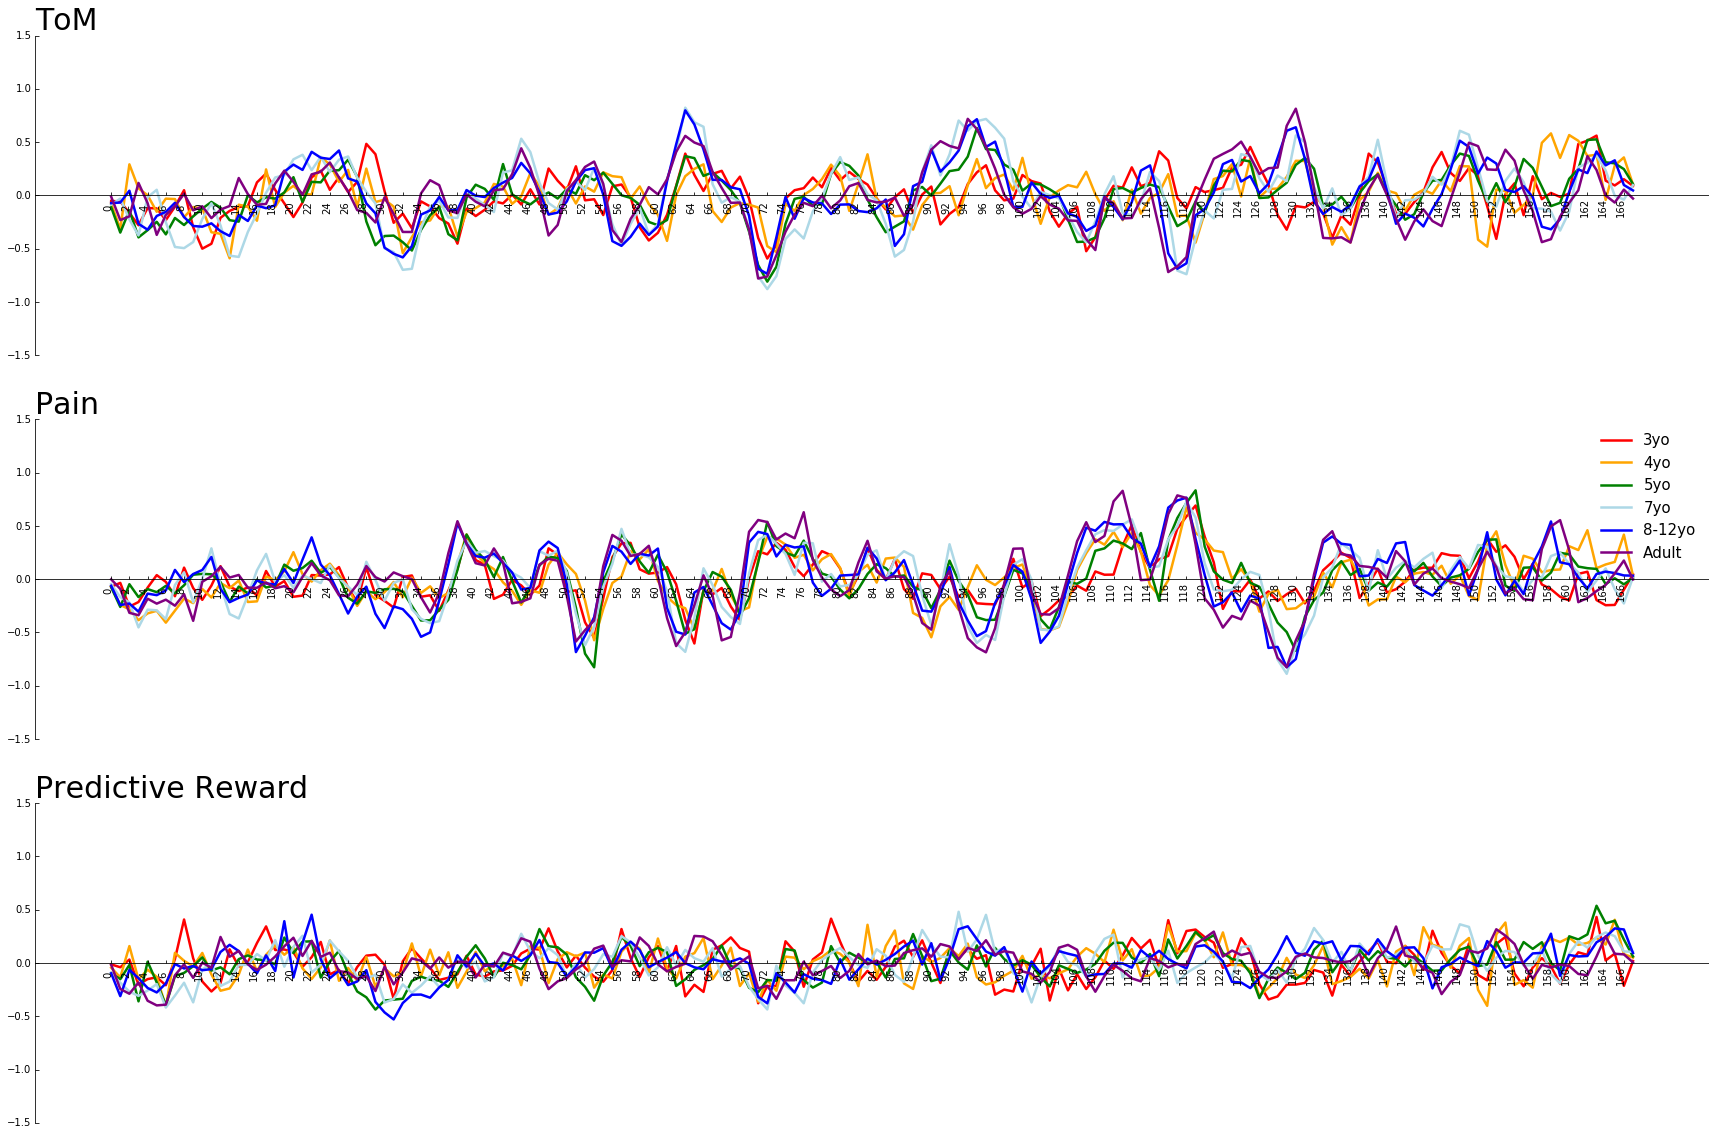

In [626]:
import mpl_toolkits.axisartist as AA
grouplabels = ['3yo','4yo','5yo','7yo','8-12yo','Adult']
colorList = ["red", "orange", "green","lightblue","blue","purple"]


fig = plt.figure(figsize=(30, 20))
ax = AA.Subplot(fig, 3, 1, 1)
fig.add_subplot(ax)
ax.axis["bottom", "top", "right"].set_visible(False)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0)
ax.axis["y=0"].toggle(all=True)
ax.axis["y=0"].major_ticklabels.set_rotation(90)

plt.xticks(range(0,168,2))
plt.ylim((-1.5, 1.5))
ax.set_title('ToM', fontsize=30, loc="left")

for i, ts in enumerate(tomRegion_meanTSList):
    plt.plot(ts,label=grouplabels[i], color=colorList[i], linewidth=2.5)
    
    

ax = AA.Subplot(fig, 3, 1, 2)
fig.add_subplot(ax)
ax.axis["bottom", "top", "right"].set_visible(False)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                      axis_direction="bottom")
ax.axis["y=0"].toggle(all=True)
ax.axis["y=0"].major_ticklabels.set_rotation(90)

plt.xticks(range(0,168,2))
plt.ylim((-1.5, 1.5))

ax.set_title('Pain', fontsize=30, loc="left")

for i, ts in enumerate(painRegion_meanTSList):
    plt.plot(range(168),ts,label=grouplabels[i], color=colorList[i], linewidth=2.5)
    plt.legend(loc="upper right",frameon=False,prop={'size': 15})
    
    
ax = AA.Subplot(fig, 3, 1, 3)
fig.add_subplot(ax)
ax.axis["bottom", "top", "right"].set_visible(False)
ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                      axis_direction="bottom")
ax.axis["y=0"].toggle(all=True)
ax.axis["y=0"].major_ticklabels.set_rotation(90)

plt.xticks(range(0,168,2))
plt.ylim((-1.5, 1.5))

ax.set_title('Predictive Reward', fontsize=30, loc="left")

for i, ts in enumerate(predRegion_meanTSList):
    plt.plot(range(168),ts,label=grouplabels[i], color=colorList[i], linewidth=2.5)

ToM time series graph in the original paper


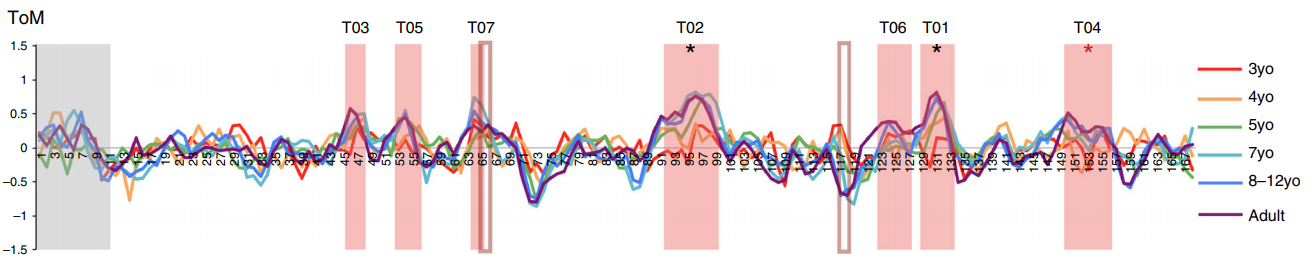

In [683]:
from IPython.display import Image

print("ToM time series graph in the original paper")
Image(filename='/home/binli/Pictures/ToM_ts.png') 

Pain time series graph in the original paper


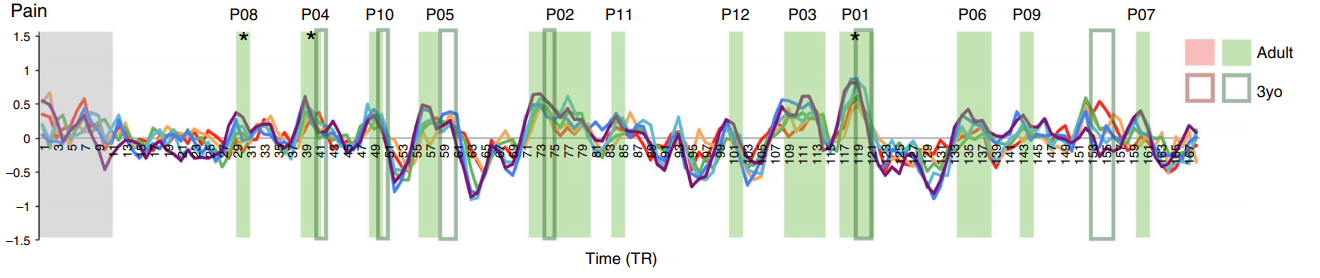

In [684]:
print("Pain time series graph in the original paper")
Image(filename='/home/binli/Pictures/Pain_ts.png') 

#### 5. Summary of reverse correlation analysis
As seen from the figures, the results in the original study are reproduced in good fidelity in my plots, with some difference that might be attributed to the use of different softwares and processing streamline. But the overall result is quatitatively similar enough  to make the same conclusion of the original paper using these reproduced graphs. This also shows that the analysis pipeline I employed here is legitimate. 

As confirming the original paper's result can be roughly replicated using my analysis pipeline, I also found that the result for predictive reward regions (which is not tested in the original study) is less notable, with the time series falls closer to the baseline. This might indicate that these regions do not necessarily operate on the same temporal window, so taking the mean of them effectively average out their activities. 

#### 6. Plotting the results of inter-region correlation analysis
ToM ROIs time series and pain ROIs time series are group together in that order to create a list, which pass into nilearn's connectome module's ConnectivityMeasure method to create a ToM-Pain correlation matrix. Similarly a Predicitve-Pain correlation matrix is also created. Figure in the original study is provided for comparison

Text(0.5, 0.75, 'Predictive Reward v.s. Pain')

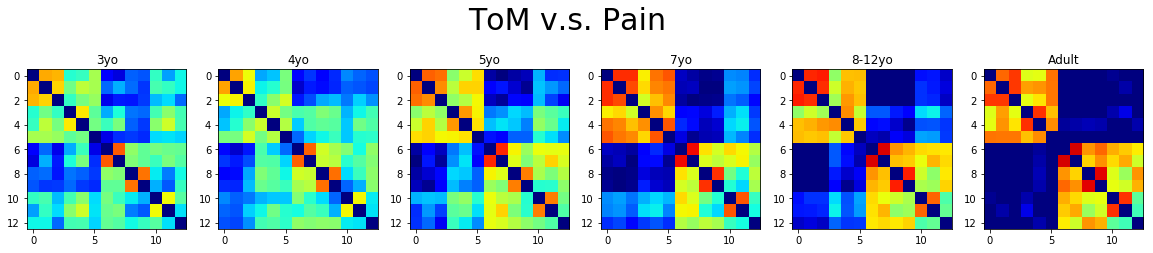

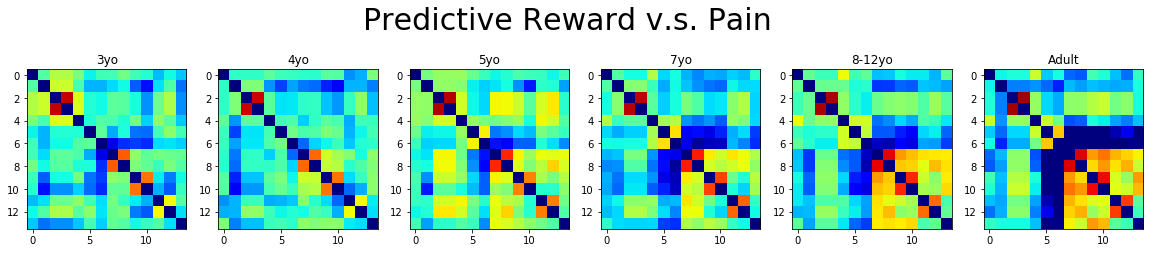

In [657]:
# Array reorganization
tompainROIs_meanTSList = [RTPJ_meanTSList, LTPJ_meanTSList, PC_meanTSList, DMPFC_meanTSList, 
                         MMPFC_meanTSList, VMPFC_meanTSList, RS2_meanTSList, LS2_meanTSList,
                         RI_meanTSList,LI_meanTSList, RMFG_meanTSList,LMFG_meanTSList,
                         AMCC_meanTSList]
tompainROIs_meanTSList= np.swapaxes(np.array(tompainROIs_meanTSList),0,1).reshape((6,13,168))
tompainROIs_meanTSList= np.swapaxes(tompainROIs_meanTSList,1,2)

predpainROIs_meanTSList = [vs_meanTSList, vta_meanTSList, ra_meanTSList, la_meanTSList, 
                         ofc_meanTSList, DMPFC_meanTSList, VMPFC_meanTSList, RS2_meanTSList,
                         LS2_meanTSList,RI_meanTSList,LI_meanTSList, RMFG_meanTSList,
                         LMFG_meanTSList,AMCC_meanTSList]
predpainROIs_meanTSList= np.swapaxes(np.array(predpainROIs_meanTSList),0,1).reshape((6,14,168))
predpainROIs_meanTSList= np.swapaxes(predpainROIs_meanTSList,1,2)


# Plotting
fig = plt.figure(figsize=(20,8))
for i, meanTS in enumerate(tompainROIs_meanTSList):
    ax=fig.add_subplot(1,6,i+1)
    ax.set_title(grouplabels[i])
    correlation_measure = nilearn.connectome.ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([meanTS])[0]
    np.fill_diagonal(correlation_matrix, -1)
    plotting.plot_matrix(correlation_matrix, axes=ax, colorbar=False,
                         vmax=1, vmin=-0.4, cmap='jet', auto_fit=True)
fig.suptitle("ToM v.s. Pain", y=0.75, fontsize=30)


fig = plt.figure(figsize=(20,8))
for i, meanTS in enumerate(predpainROIs_meanTSList):
    ax=fig.add_subplot(1,6,i+1)
    ax.set_title(grouplabels[i])
    correlation_measure = nilearn.connectome.ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([meanTS])[0]
    np.fill_diagonal(correlation_matrix, -1)
    plotting.plot_matrix(correlation_matrix, axes=ax, colorbar=False,
                         vmax=1, vmin=-0.4, cmap='jet', auto_fit=True)
    
fig.suptitle("Predictive Reward v.s. Pain", y=0.75, fontsize=30)

ToM v.s. Pain correlation matrix in the original paper


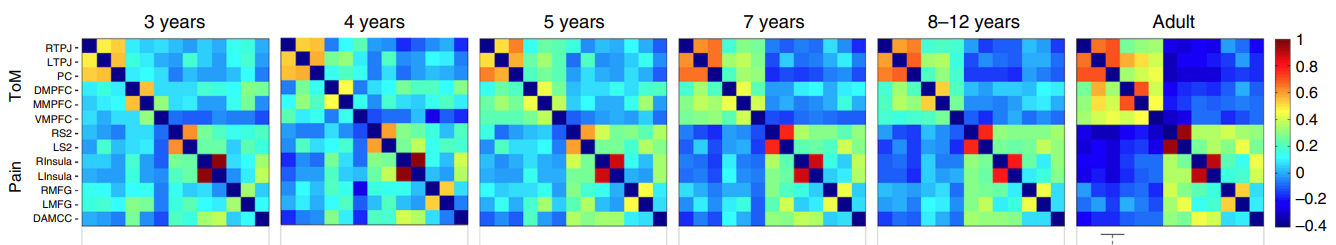

In [686]:
print("ToM v.s. Pain correlation matrix in the original paper")
Image(filename='/home/binli/Pictures/matrix.png') 

#### 7. Summary of inter-region correlation analysis
Again, as seen from the figures, the results in the original study are reproduced in good fidelity in my plots, which show that the analysis pipeline is legitimate. The ToM-Pain matrix shows that starting as early as 5 years old, the ToM and Pain network show higher within-group correlation and lower between-group correlation, which is a evidence for the functional maturities and specialization of these two networks. This is visually telling from the bright boxes shown in the matrix that indicates within group correlation.

The result for predictive reward regions (which is not tested in the original study) is, again, less notable, with the matrix have less telling box form for the predictive regions. This might indicate that these regions do not necessarily follow the same developmental trend and they might not form a simple concurrent correlation network. 

### III. Verification of Functional Localization Using Massively Univariate General Linear Model
To reversely verify the ROIs identified in the original study, I create a GLM using the ToM and pain event defined in the original study to try to localize the same ROIs across the adult subjects. This analysis is not in the original study

#### 1. First level model specification
A first level model is specificed using ToM and pain events and the nuisance regressors (motion artifact time points and CompCor PCA-based noise components) provided in the original dataset. The model uses Glover's hemodynamic impulse response function. It also use 0.01hz high-pass filter and includes in 6 cosine drift to soak up signal drift and other noises. The analysis is mask with a brain mask provided in the original dataset that gets rid of background and skulll in the bold signals. Contrast is coded to test ToM > Pain.

Example is plotted to show contrast matrix, design matrix, computed contrast map, and uncorrected thresholded (p<0.001) image.

/home/binli/enter/lib/python3.6/site-packages/nistats/first_level_model.py:135: RuntimeWarning: divide by zero encountered in true_divide
  (ols_result.resid ** 2).sum(axis=0))
/home/binli/enter/lib/python3.6/site-packages/nistats/first_level_model.py:135: RuntimeWarning: invalid value encountered in true_divide
  (ols_result.resid ** 2).sum(axis=0))
/home/binli/enter/lib/python3.6/site-packages/nistats/utils.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)


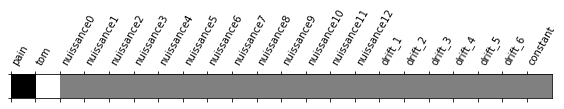

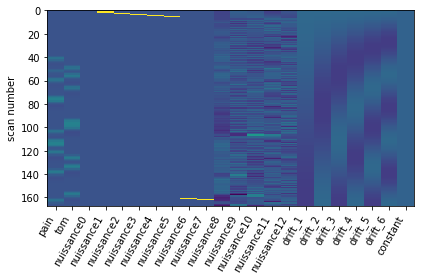

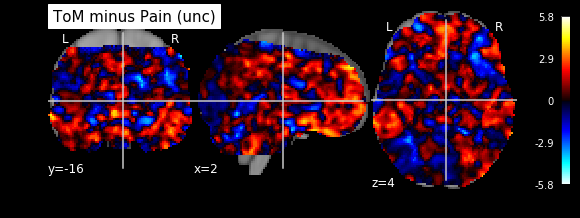

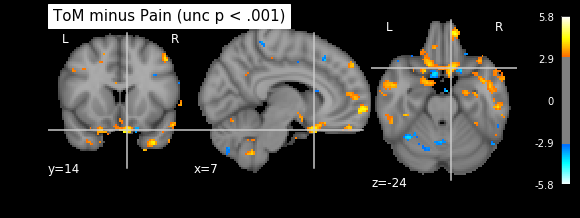

In [681]:
from nistats.first_level_model import FirstLevelModel
from nistats.reporting import plot_contrast_matrix, plot_design_matrix

def getContrast(designM):
    contrastList = np.zeros(len(designM.columns))
    contrastList[0:2]=[-1,1]
    return contrastList

# plot an example
testSubjID = 130
testBold = nib.load(getSubData(testSubjID,'bold'))
testBrain = getBrainMask(nib.load(getSubData(testSubjID,'brain')))
testNuis = getSubNuis(testSubjID)

first_level_model = FirstLevelModel(t_r=tr,
                                    hrf_model='glover',
                                    drift_model='cosine',
                                    high_pass=.01, 
                                    mask_img=testBrain)

first_level_model = first_level_model.fit(testBold,
                                          events=tomPainEve, 
                                          confounds=testNuis)
design_matrix = first_level_model.design_matrices_[0]
plot_contrast_matrix(getContrast(design_matrix),design_matrix)
plot_design_matrix(design_matrix)

testMap = first_level_model.compute_contrast(getContrast(design_matrix),output_type='z_score')


from scipy.stats import norm
p_val = 0.001
p001_unc = norm.isf(p_val)

plot_stat_map(testMap, 
              display_mode='ortho', black_bg=True,
              title='ToM minus Pain (unc)')
plot_stat_map(testMap, threshold = p001_unc,
              display_mode='ortho', black_bg=True,
              title='ToM minus Pain (unc p < .001)')



#### 2. Second level model specification
After a first-level model is created for all the adult subjects. The models are group together and will be passed into the second-level model for analysis. The second-level model employs a simple T-test to compute the significant changes in the output contrast maps in the first-level model.

All the subject's first level contrasts are also plotted here.

/home/binli/enter/lib/python3.6/site-packages/nistats/first_level_model.py:70: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'
/home/binli/enter/lib/python3.6/site-packages/nistats/first_level_model.py:135: RuntimeWarning: divide by zero encountered in true_divide
  (ols_result.resid ** 2).sum(axis=0))
/home/binli/enter/lib/python3.6/site-packages/nistats/first_level_model.py:135: RuntimeWarning: invalid value encountered in true_divide
  (ols_result.resid ** 2).sum(axis=0))
/home/binli/enter/lib/python3.6/site-packages/nistats/utils.py:300: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(X <= 0, 0, 1. / X)
/home/binli/enter/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "

Text(0.5, 0.98, 'subjects z_map language network (unc p<0.001)')

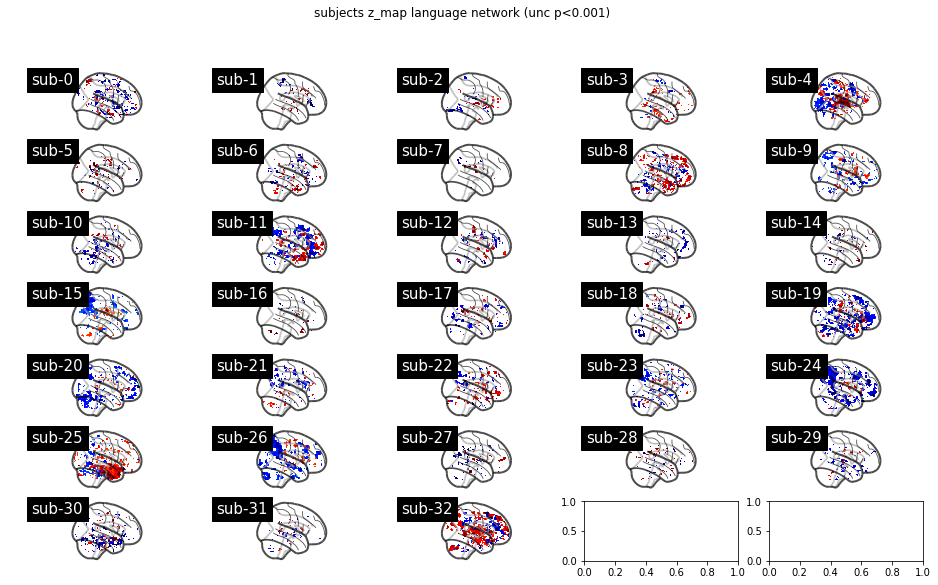

In [476]:
models = []
boldImgs = []
confounds = []
for i in idAdult:
    boldImg = nib.load(getSubData(i, "bold"))
    brainMask = getBrainMask(nib.load(getSubData(i,'brain')))
    nuis = getSubNuis(i)
    first_level_model = FirstLevelModel(t_r=tr,
                                        hrf_model='glover',
                                        drift_model='cosine', 
                                        high_pass=.01,
                                        n_jobs=-2,
                                        mask_img=brainMask)
    models.append(first_level_model)
    boldImgs.append(boldImg)
    confounds.append(nuis)

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(16, 9))
model_and_args = zip(models, boldImgs, confounds)
for i, (model, img, confound) in enumerate(model_and_args):
    # fit the GLM
    model.fit(img, tomPainEve, confound)
    # compute the contrast of interest
    zmap = model.compute_contrast('tom-pain')
    plotting.plot_glass_brain(zmap, colorbar=False, threshold=p001_unc,
                              title=('sub-' + str(i)),
                              axes=axes[int(i / 5), int(i % 5)],
                              plot_abs=False, display_mode='x')
fig.suptitle('subjects z_map ToM - Pain (unc p<0.001)')

#### 3. Second level model analysis
The second level model result is computed and 4 figures are plotted here. The first one is the second level uncorrected contrast (ToM > Pain, p < .000001, cluster size > 2). The second one is the same as the first one but plotting in a glass brain template and overlay with the pain ROIs provided in the original dataset for quick alignment check. 

The third one is the second level false discover rate (fdr) corrected contrast (ToM > Pain,fdr = .085). The fourth one is the same as the third but plotting in a glass brain template and overlay with the ToM ROIs. 

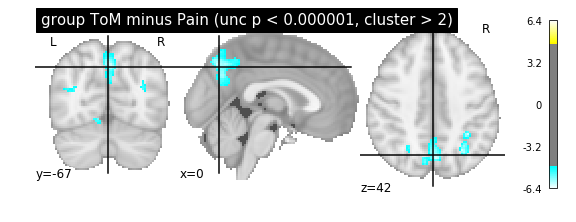

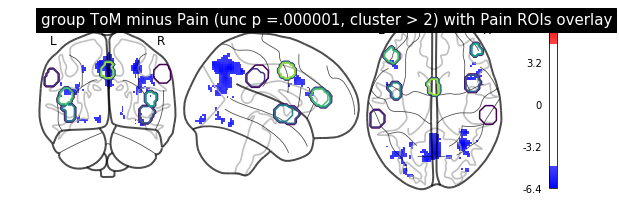

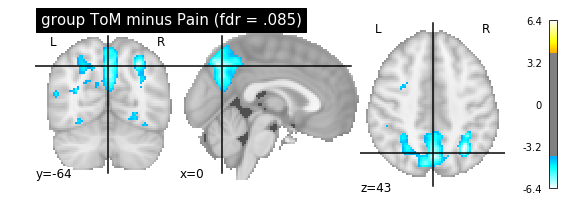

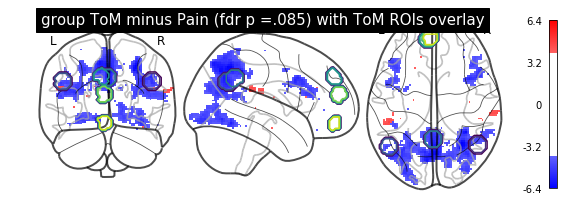

In [478]:
from nistats.second_level_model import SecondLevelModel

second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(models)

zmap = second_level_model.compute_contrast(first_level_contrast='tom-pain')

fprMap, fprCorr = map_threshold(zmap, alpha=.000001,
                                height_control='fpr', 
                                cluster_threshold=2)

plot_stat_map(zmap,threshold=fprCorr, 
              display_mode='ortho',
              title='group ToM minus Pain (unc p < 0.000001, cluster > 2)')

plotting.plot_glass_brain(zmap, 
                          threshold=fprCorr,
                          display_mode='ortho', 
                          cmap="bwr",
                          colorbar=True,
                          plot_abs=False,
                          title='group ToM minus Pain (unc p =.000001, cluster > 2) with Pain ROIs overlay').add_contours(painROI)


thresholded_map2, threshold2 = map_threshold(zmap, alpha=.085, height_control='fdr')
plotting.plot_stat_map(zmap, 
                       display_mode='ortho',
                       title='group ToM minus Pain (fdr = .085)',
                       threshold=threshold2)

plotting.plot_glass_brain(zmap, 
                          threshold=threshold2, 
                          display_mode='ortho', 
                          cmap="bwr",
                          colorbar=True,
                          plot_abs=False,
                          title='group ToM minus Pain (fdr p =.085) with ToM ROIs overlay').add_contours(tomROI)

#### 4. GLM localization analysis summary
GLM result of ROIs localization does not align well with the predefined ROIs provided in the original study's dataset. The localization results are also not consistent across individual subjects, as can be seen in the plot of the single subject-level contrasts maps. Some highly activated individuals could have considerably swayed the group-level result. This throws into the question the validity of the predefined functional ROIs used in the original dataset and might warrant a closer look into this issue. 

## Conclusion
This project roughly replicated the result presented in the study by Richardson et al. (2018) using the same dataset but different analysis tools and pipeline, confirming the robustness of the original findings. Particularly, this project demonstrates again that functional specialization of the ToM and empathic pain network (as defined by the ROIs provided in the original study) in term of functional correlation is very telling in adult and is mature in as early as 5 years old. 

However, the same is not observed in the predictive reward regions as a whole, which might indicate that the predictive reward regions listed here do not work as a concurrent correlated network. Or maybe predictive reward system is not organized as a single correlated neural edifice but rather comprised of many intricate subsystem for computing more nuance of reward. Indeed, there is a growing body of evidence for different types of prediction reward that activates different subsystems of the predictive reward regions (Daw et al., 2011; Diuk et al., 2013). If that is the case, then more complicated methods than those employed by Richardson et al. (2018) are needed for detecting and modeling this effect. This could also be caused by the individual variation in the anatomical landmarks that were used to pinpoint those ROIs. For future study, it might be beneficial to conduct a functional localization task on a seperate group of subjects with the same stimulus to obtain the experiment-tailored functional ROIs.

On the other hand, the result of the GLM localization analysis conducted in the project is at odd with the predefined ROIs provided in the original dataset. The predefined ToM/Pain ROIs do not match well with the activated regions defined by the group-level GLM ToM > Pain contrast map. This warrants a closer look into the data processing pipeline used in this project and/or the processing of the original study.

## References

Behrens, T. E. J., Hunt, L. T., Woolrich, M. W., & Rushworth, M. F. S. (2008). Associative learning of social value. *Nature*, 456(7219), 245–249. https://doi.org/10.1038/nature07538

Burke, C. J., Tobler, P. N., Baddeley, M., & Schultz, W. (2010). Neural mechanisms of observational learning. *Proceedings of the National Academy of Sciences of the United States of America*, 107(32), 14431–14436. https://doi.org/10.1073/pnas.1003111107

Corlett, P. R., Aitken, M. R. F., Dickinson, A., Shanks, D. R., Honey, G. D., Honey, R. A. E., … Fletcher, P. C. (2004). Prediction error during retrospective revaluation of causal associations in humans: fMRI evidence in favor of an associative model of learning. *Neuron*, 44(5), 877–888. https://doi.org/10.1016/j.neuron.2004.11.022

Daw, N. D., Gershman, S. J., Seymour, B., Dayan, P., & Dolan, R. J. (2011). Model-based influences on humans’ choices and striatal prediction errors. *Neuron*, 69(6), 1204–1215. https://doi.org/10.1016/j.neuron.2011.02.027

Diuk, C., Tsai, K., Wallis, J., Botvinick, M., & Niv, Y. (2013). Hierarchical learning induces two simultaneous, but separable, prediction errors in human basal ganglia. *Journal of Neuroscience*, 33(13), 5797–5805. https://doi.org/10.1523/JNEUROSCI.5445-12.2013

Gallagher, H. L., Happé, F., Brunswick, N., Fletcher, P. C., Frith, U., & Frith, C. D. (2000). Reading the mind in cartoons and stories: An fMRI study of “theory of mind” in verbal and nonverbal tasks. *Neuropsychologia*, 38(1), 11–21. https://doi.org/10.1016/S0028-3932(99)00053-6

Gottfried, J. A., O’Doherty, J., & Dolan, R. J. (2003). Encoding predictive reward value in human amygdala and orbitofrontal cortex. *Science*, 301(5636), 1104–1107. https://doi.org/10.1126/science.1087919

Jacoby, N., Bruneau, E., Koster-Hale, J., & Saxe, R. (2016). Localizing Pain Matrix and Theory of Mind networks with both verbal and non-verbal stimuli. *NeuroImage*, 126, 39–48. https://doi.org/10.1016/j.neuroimage.2015.11.025

O’Doherty, J. P. (2004, December). Reward representations and reward-related learning in the human brain: Insights from neuroimaging. *Current Opinion in Neurobiology*. https://doi.org/10.1016/j.conb.2004.10.016

Richardson, H., Lisandrelli, G., Riobueno-Naylor, A., & Saxe, R. (2018). Development of the social brain from age three to twelve years. *Nature Communications*, 9(1). https://doi.org/10.1038/s41467-018-03399-2

Suzuki, S., Harasawa, N., Ueno, K., Gardner, J. L., Ichinohe, N., Haruno, M., … Nakahara, H. (2012). Learning to Simulate Others’ Decisions. *Neuron*, 74(6), 1125–1137. https://doi.org/10.1016/j.neuron.2012.04.030

Zaki, J., Wager, T. D., Singer, T., Keysers, C., & Gazzola, V. (2016, April 1). The Anatomy of Suffering: Understanding the Relationship between Nociceptive and Empathic Pain. *Trends in Cognitive Sciences*. https://doi.org/10.1016/j.tics.2016.02.003